In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("C:\\Users\\Aditya Shakya\\OneDrive\\Desktop\\datasets\\winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, alcohol
X = df.iloc[:,:-1].values
y = df['quality'].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1.head()

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529


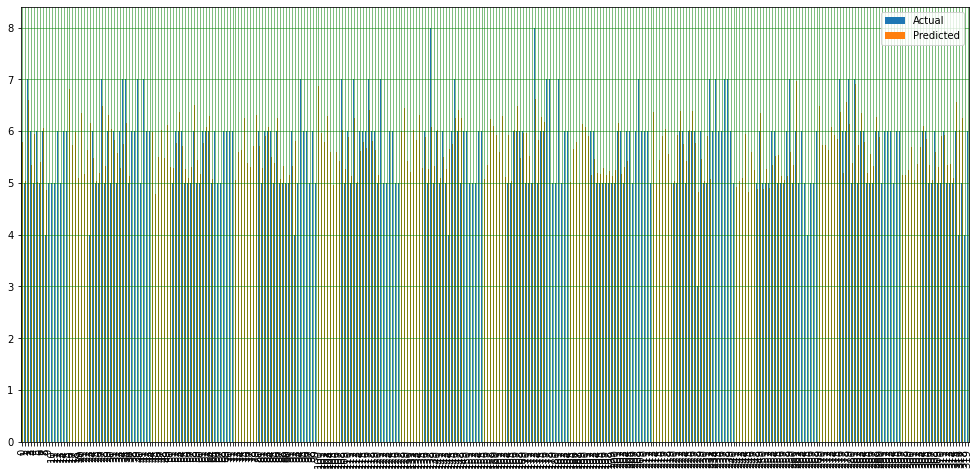

In [11]:
df1.plot(kind='bar',figsize = (17,8))
plt.grid(which = 'major',linestyle='-',linewidth = '0.5',color = 'green')
plt.grid(which = 'minor',linestyle=':',linewidth = '0.5',color = 'black')
plt.show()

In [23]:
print("Mean absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score : ",metrics.r2_score(y_test,y_pred))

Mean absolute Error :  0.4696330928661106
Mean Squared Error :  0.3844711978201241
Root mean squared error :  0.6200574149384266
R2 Score :  0.32838876395802274


In [ ]:
class MLR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis = 1)
        
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_)+self.intercept_
        return y_pred

In [14]:
mlr = MLR()

In [15]:
mlr.fit(X_train,y_train)

In [16]:
print(mlr.intercept_)

34.99871062042226


In [17]:
print(mlr.coef_)

[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


In [18]:
model.coef_

array([ 4.12835075e-02, -1.14952802e+00, -1.77927063e-01,  2.78700036e-02,
       -1.87340739e+00,  2.68362616e-03, -2.77748370e-03, -3.15166657e+01,
       -2.54486051e-01,  9.24040106e-01,  2.67797417e-01])

In [64]:
model.intercept_

34.998710628721064